<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
# Classification metrics demo

---

## Learning Goals

### Core
- Calculate the most common classification evaluation metrics
    - Accuracy
    - Precision
    - Recall
    - F1
- Understand how the ability to classify depends on the feature distribution
- Understand the role of threshold changes


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
def plot_class_assignment(loc_1=1,loc_2=5,scale_1=2,scale_2=2,odds=1):
    """
    Arguments:
    loc_1: mean of first class
    loc_2: mean of second class
    scale_1: standard deviation of first group
    scale_2: standard deviation of second group
    odds: decision threshold for assigning to either of the two classes
    Returns:
    Plots of normal distributions resulting from given inputs,
    labels assigned according to odds,
    calculates classification metrics
    """
    
    
    x = np.linspace(-10,12, 10000)
    y_1 = stats.norm.pdf(x,loc=loc_1,scale=scale_1)
    y_2 = stats.norm.pdf(x,loc=loc_2,scale=scale_2)
    

    if loc_2 >= loc_1:
        threshold = x[y_2 <= odds*y_1].max()
    else:
        threshold = x[y_2 <= odds*y_1].min()

    TN = stats.norm.cdf(threshold,loc=loc_1,scale=scale_1)
    FP = 1.-stats.norm.cdf(threshold,loc=loc_1,scale=scale_1)
    TP = 1.-stats.norm.cdf(threshold,loc=loc_2,scale=scale_2)
    FN = stats.norm.cdf(threshold,loc=loc_2,scale=scale_2)

    accuracy = np.round((TN+TP)/(TN+TP+FP+FN),3)
    precision = np.round(TP/(TP+FP),3)
    recall = np.round(TP/(TP+FN),3)
    FPR = np.round(FP/(FP+TN),3)
    confusion_matrix = np.round(np.array([[TP,FN],[FP,TN]]),3)

    print('Threshold:', threshold)
    print('TN:', TN)
    print('FP:', FP) 
    print('TP:', TP) 
    print('FN:', FN)

    print('Confusion matrix:\n', confusion_matrix)
    print('Accuracy:\t', np.round(accuracy,3))
    print('Precision:\t', np.round(precision,3))
    print('Recall/TPR:\t', np.round(recall,3))
    print('FPR:\t\t', np.round(FPR,3))

    fig, ax = plt.subplots(ncols=2,figsize=(20,10))

    ax[0].plot(x, y_1,'r-', lw=2, alpha=0.6, label='negative')
    ax[0].plot(x, y_2,'b-', lw=2, alpha=0.6, label='positive')
    ax[0].axvline(threshold,ls='--',lw=2,c='k')

    ax[0].fill_between(x, y_1, 0, where=(y_2 <= odds*y_1 ), 
                       facecolor='r',alpha=0.6, interpolate=True,label='TN')
    ax[0].fill_between(x, y_1, 0, where=(y_2 >= odds*y_1 ), 
                       facecolor='b',alpha=0.6, interpolate=True,label='FP')

    ax[0].annotate('TN', xy=(5, 0.005), xycoords='data',
                        xytext=(threshold-2.5, 0.015), 
                        va="top", ha="right",fontsize=20)
    ax[0].annotate('FP', xy=(5, 0.005), xycoords='data',
                        xytext=(threshold+2, 0.015), 
                        va="top", ha="right",fontsize=20)

    ax[0].legend(fontsize=20)
    ax[0].tick_params(labelsize=16)



    ax[1].plot(x, y_1,'r-', lw=2, alpha=0.6, label='negative')
    ax[1].plot(x, y_2,'b-', lw=2, alpha=0.6, label='positive')
    ax[1].axvline(threshold,ls='--',lw=2,c='k')

    ax[1].fill_between(x, y_2, 0, where=(y_2 >= odds*y_1 ), 
                       facecolor='g',alpha=0.6, interpolate=True,label='TP')
    ax[1].fill_between(x, y_2, 0, where=(y_2 <= odds*y_1 ), 
                       facecolor='orange',alpha=0.6, interpolate=True,label='FN')

    ax[1].annotate('FN', xy=(5, 0.005), 
                        xytext=(threshold-1, 0.015), 
                        va="top", ha="right",fontsize=20)
    ax[1].annotate('TP', xy=(5, 0.005), 
                        xytext=(threshold+2, 0.015), 
                        va="top", ha="right",fontsize=20)

    ax[1].legend(fontsize=20)
    ax[1].tick_params(labelsize=16)

    plt.suptitle('Accuracy: {}, Precision: {}, \nRecall/TPR: {}, FPR: {}'.format(accuracy,precision,recall,FPR),fontsize=30)
    plt.show()
    
    return fig, ax

Threshold: 2.998899889988998
TN: 0.8412116122549456
FP: 0.15878838774505444
TP: 0.8414778066713584
FN: 0.15852219332864154
Confusion matrix:
 [[0.841 0.159]
 [0.159 0.841]]
Accuracy:	 0.841
Precision:	 0.841
Recall/TPR:	 0.841
FPR:		 0.159


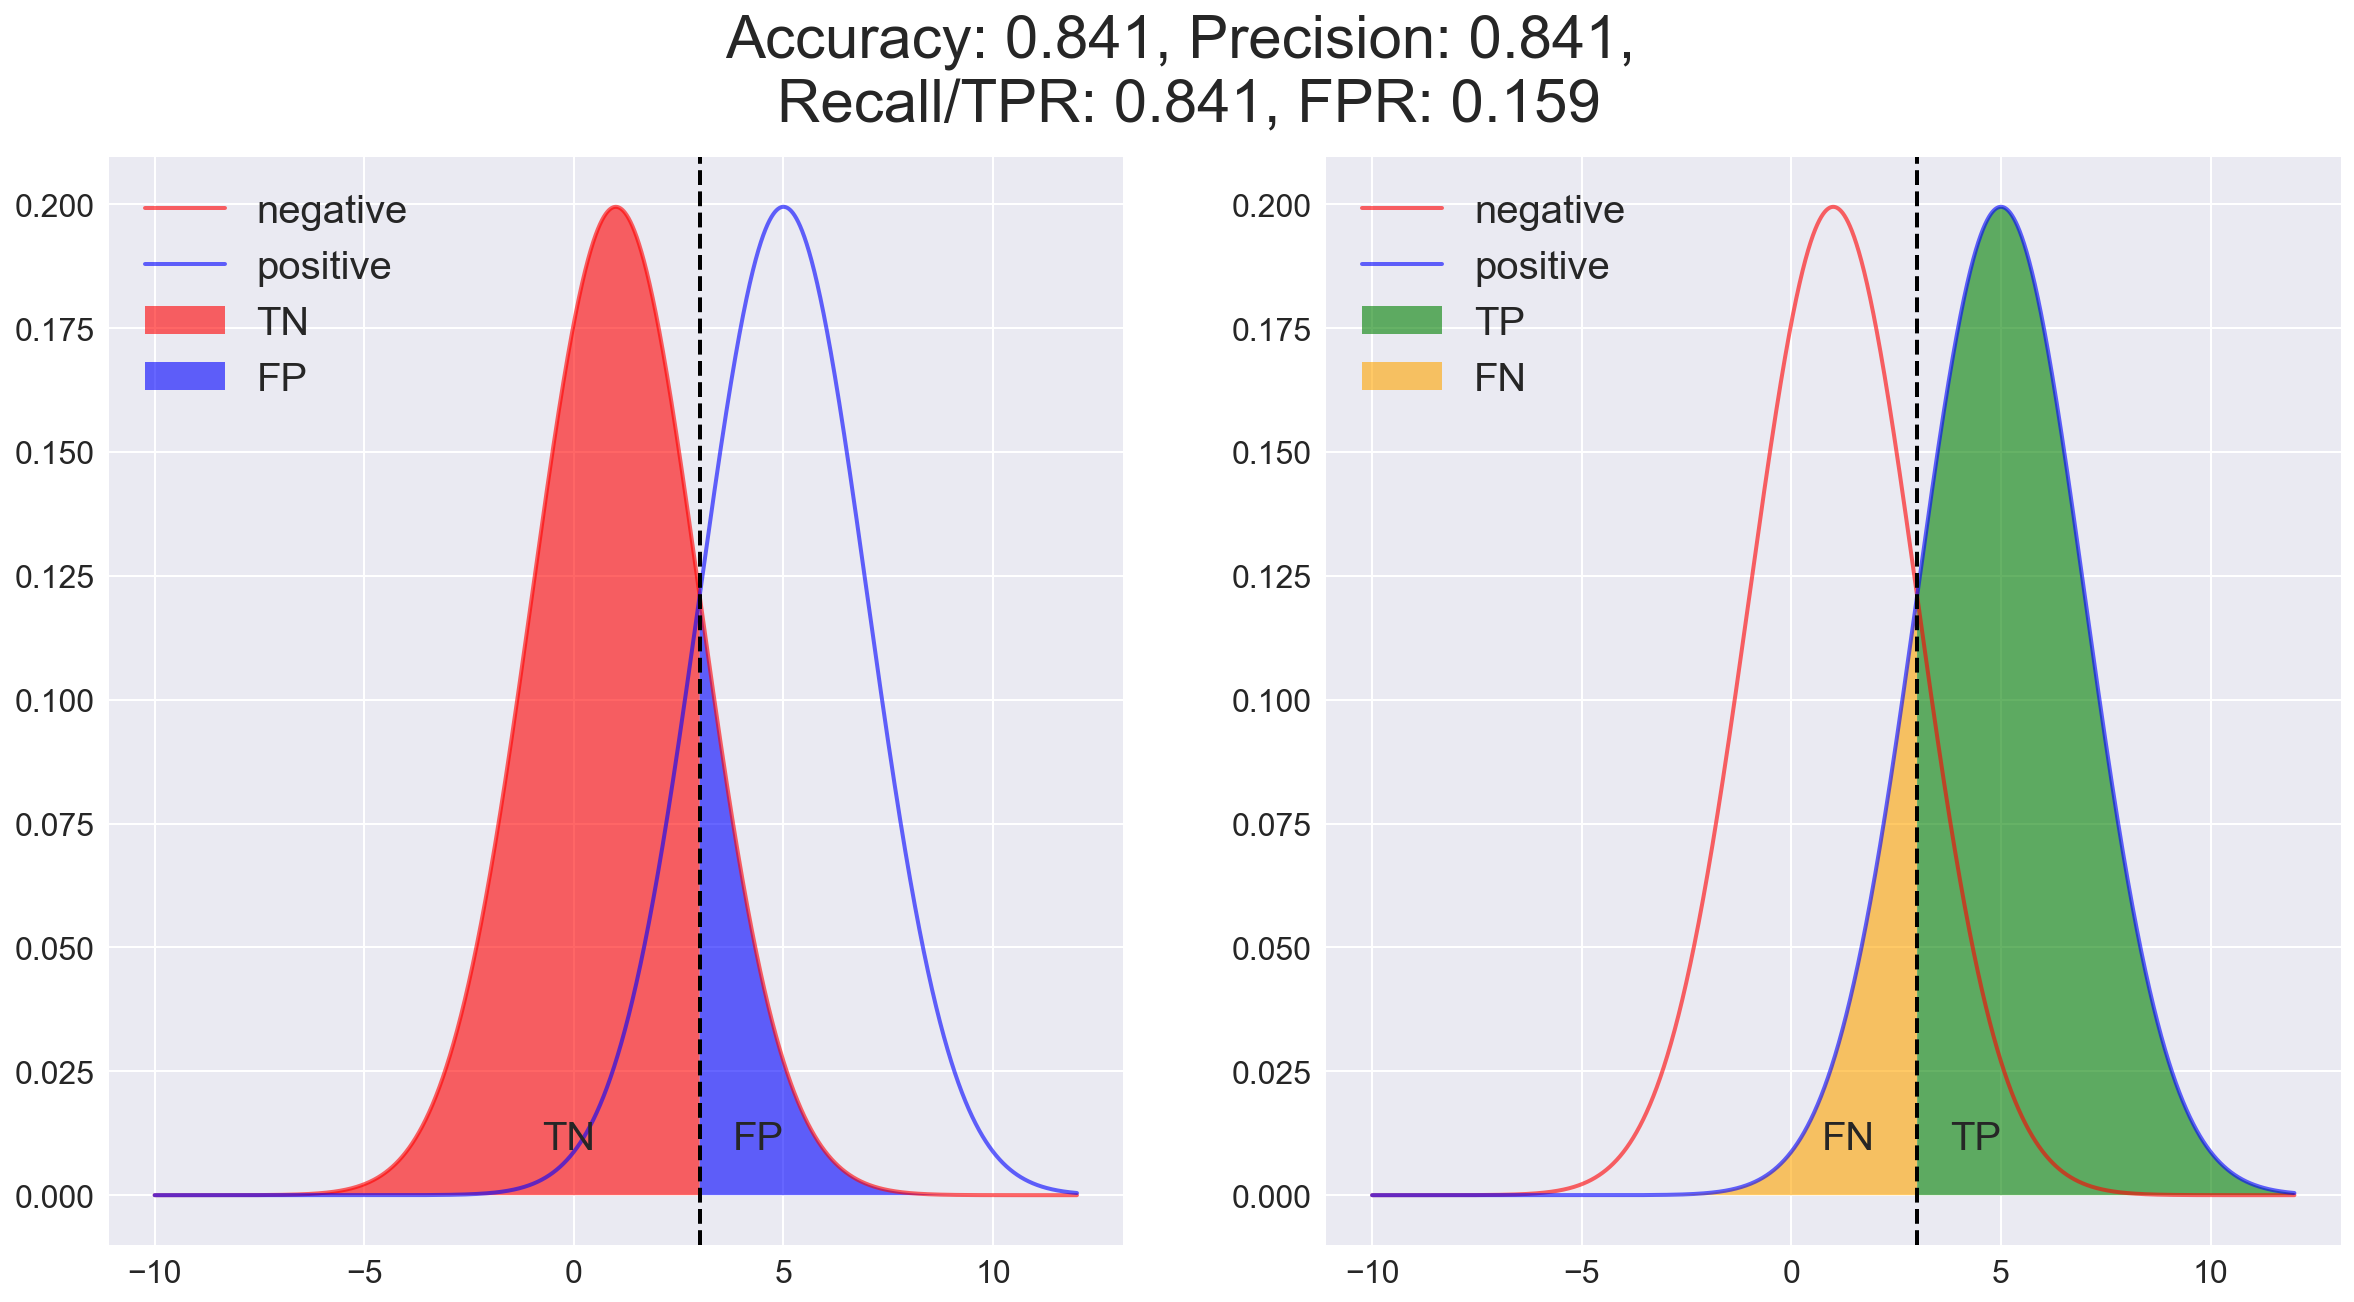

In [3]:
fig, ax = plot_class_assignment(loc_1=1,loc_2=5,scale_1=2,scale_2=2,odds=1)

|Measure|Areas|
| ------------- |:-------------:| -----:|
|**Accuracy:**| **(red+green) / (red+green+blue+orange)**|
|**Precision:**| **green / (green+blue)**|
|**Recall/TPR:**| **green / (green+orange)**|
|**FPR:**| **blue / (blue+red)**|

## To do

#### Modulate the threshold by changing the variable `odds`

- Increasing `odds`, for example setting it to 100, brings FP down.
- Decreasing `odds`, for example setting it to 0.1, brings FN down.

#### Change the means of the distributions `loc_1` and `loc_2`. What happens if they are equal? What if `loc_2<loc_1`?

- If the means of the distributions are far apart, the distributions have little overlap and the feature allows clear discrimination between different classes.
- The closer together the means are, the more overlap the two distributions have, so that the variable is not very useful as a predictor for class outcome. As a consequence, TP, TN, FP and FN will all have nearly the same value.
- If `loc_2<loc_1`, FPR becomes smaller than the recall. In that case one could consider swapping the class labels.

#### Change the standard deviations of the distributions `scale_1` and `scale_2`. What happens if they differ? What about the tails of the distributions?

- If the standard deviations of the distributions change, they might have more overlap resulting in more wrongly classified data points. 
- Choose for example `scale_1=2` and `scale_2=4` and look at the tails of the distribution. As the positive class distribution now decays less fast, you can observe disconnected patches of the same colour which will lead to more TP and FP classifications.

#### What do you think how the AUC changes when you play with those parameters?

- The AUC is related to the recall and the FPR. Its value is the greater the greater the recall is for every possible choice of `odds`. We observe higher recall (lower number of FN) if the predictor considered is a good discriminator between the two classes and there is little overlap of the distributions. If there is a lot of overlap, the predictor does not distinguish well between the two classes and the AUC remains low.